#### Instalação e Carregamento das bibliotecas necessárias para execução de todas as etapas da Analise Exploratória ####

In [ ]:
#Instalar biblioteca Pandas, se necessário (https://pypi.org/project/pandas/)
#!pip install pandas

#Instalar biblioteca Mitosheet, se necessário (https://pypi.org/project/mitosheet/)
#!pip install mitoinstaller
#!python -m mitoinstaller install

#Instalar biblioteca Plotly Express, se necessário (https://pypi.org/project/plotly-express/)
#!pip install plotly_express==0.4.0

#Instalar biblioteca Numpy, se necessário (https://pypi.org/project/numpy/)
#!pip install numpy

#Instalar biblioteca Seaborn, se necessário (https://pypi.org/project/seaborn/)
#!pip install seaborn

#Instalar biblioteca Wordcloud, se necessário (https://pypi.org/project/wordcloud/)
#!pip install wordcloud

#Instalar biblioteca Wordcloud, se necessário (https://pypi.org/project/nltk/)
#!pip install nltk

In [1]:
import numpy as np
import pandas as pd
import mitosheet as mito
import plotly.express as px
import nltk
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

#### Carregamento da base tratada - arquivo de saída do Knime - e realização da análise exploratória inicial, que consiste em: ####
  - Visualização das primeiras linhas;
  - Visualização das informações sobre o arquivo e as variáveis;
  - "Describe" (descrição) das variáveis. No caso foram realizadas duas execuções, sendo que a segunda apresenta informações sobre as variáveis não numéricas.

In [2]:
# Imported base_tratada.csv
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

base_tratada.head()

,NrMotivo,OrdemResposta,OrdemEncerramento,Categoria Maior,Status do SLA,Origem,Produto,Avaliação,Tempo utilizado para resolução (min),Motivo,Comentário,PesquisaRespondida,Favorabilidade,Ano/Mes_Resposta,Ano/Mes_Encerramento
0,NaN,NaN,1,Incidentes,Fora do Prazo,Outros,MOBILIDADE,0.0,1341.0,NaN,NaN,0.0,NaN,?/?,2021/1
1,NaN,NaN,1,Solicitações de Serviço,Fora do Prazo,ITSM,SAP,0.0,1371.0,NaN,NaN,0.0,NaN,?/?,2021/1
2,NaN,NaN,1,Solicitações de Serviço,No Prazo,ITSM,APLICACOES VIRTUALIZADAS,0.0,881.0,NaN,NaN,0.0,NaN,?/?,2021/1
3,3.0,1.0,1,Solicitações de Serviço,Fora do Prazo,ITSM,SAP,4.0,1366.0,Solucao,NaN,1.0,1.0,2021/1,2021/1
4,NaN,NaN,1,Solicitações de Serviço,Fora do Prazo,ITSM,SUPORTE TIC AUTOMACAO,0.0,1362.0,NaN,NaN,0.0,NaN,?/?,2021/1


In [3]:
base_tratada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253169 entries, 0 to 1253168
Data columns (total 15 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   NrMotivo                              154945 non-null   float64
 1   OrdemResposta                         153993 non-null   float64
 2   OrdemEncerramento                     1253169 non-null  int64  
 3   Categoria Maior                       1253142 non-null  object 
 4   Status do SLA                         1253142 non-null  object 
 5   Origem                                1253142 non-null  object 
 6   Produto                               1253109 non-null  object 
 7   Avaliação                             1253142 non-null  float64
 8   Tempo utilizado para resolução (min)  1253142 non-null  float64
 9   Motivo                                154945 non-null   object 
 10  Comentário                            29027 non-null  

In [4]:
base_tratada.describe()

,NrMotivo,OrdemResposta,OrdemEncerramento,Avaliação,Tempo utilizado para resolução (min),PesquisaRespondida,Favorabilidade
count,154945.000000,153993.000000,1.253169e+06,1.253142e+06,1.253142e+06,1.253142e+06,154973.000000
mean,2.622189,10.387472,1.086888e+01,5.792767e-01,1.578235e+01,1.236675e-01,0.931601
std,1.234531,5.990242,6.115872e+00,1.569723e+00,1.053586e+02,3.292020e-01,0.252430
min,1.000000,1.000000,1.000000e+00,0.000000e+00,-4.900000e+01,0.000000e+00,0.000000
25%,2.000000,5.000000,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,3.000000,10.000000,1.100000e+01,0.000000e+00,1.000000e+00,0.000000e+00,1.000000
75%,3.000000,16.000000,1.600000e+01,0.000000e+00,4.000000e+00,0.000000e+00,1.000000
max,5.000000,21.000000,2.100000e+01,5.000000e+00,5.698000e+03,1.000000e+00,1.000000


In [5]:
base_tratada.describe(include=object)

,Categoria Maior,Status do SLA,Origem,Produto,Motivo,Comentário,Ano/Mes_Resposta,Ano/Mes_Encerramento
count,1253142,1253142,1253142,1253109,154945,29027,1253142,1253169
unique,2,2,5,1028,5,22081,23,21
top,Incidentes,No Prazo,Telefone,MICROCOMPUTADOR,Solucao,Excelente atendimento.,?/?,2021/3
freq,738682,1146649,616813,208372,53991,401,1098197,72257


#### Criando matrizes de correlação entre as variáveis ####
  - Identificar variáveis com maiores dependências;

In [6]:
#Matriz de correlação das variáveis numéricas
correlation = base_tratada.corr()
correlation

,NrMotivo,OrdemResposta,OrdemEncerramento,Avaliação,Tempo utilizado para resolução (min),PesquisaRespondida,Favorabilidade
NrMotivo,1.000000,-0.005200,-0.010756,-0.045609,0.010631,NaN,-0.026440
OrdemResposta,-0.005200,1.000000,0.996140,0.014269,-0.022178,NaN,0.011784
OrdemEncerramento,-0.010756,0.996140,1.000000,-0.038390,-0.012605,-0.040035,0.011055
Avaliação,-0.045609,0.014269,-0.038390,1.000000,-0.003932,0.982358,0.883311
Tempo utilizado para resolução (min),0.010631,-0.022178,-0.012605,-0.003932,1.000000,0.001856,-0.084745
PesquisaRespondida,NaN,NaN,-0.040035,0.982358,0.001856,1.000000,NaN
Favorabilidade,-0.026440,0.011784,0.011055,0.883311,-0.084745,NaN,1.000000


<AxesSubplot: >

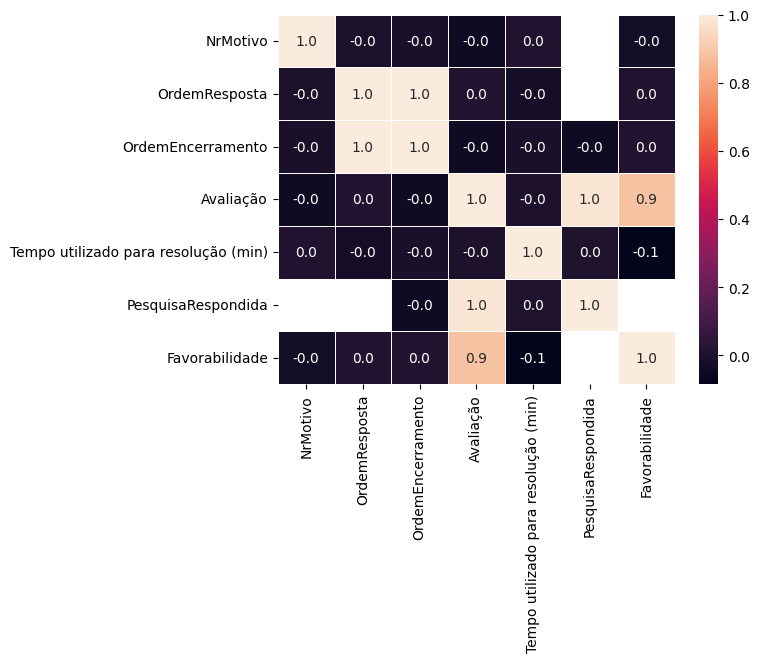

In [7]:
#Plot da matiz de correlação
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

#### Contagem da quantidade de registros encerrados por mês (cada registro encerrado envia uma pesquisa de satisfação) ####
  - Segregação por Incidentes e Solicitações de Serviços;
  - Apresentação em trabela e visualização gráfica.

In [8]:
# Imported base_tratada.csv
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to pesquisas_enviadas
pesquisas_enviadas = base_tratada_pivot

# Pivoted into base_tratada
tmp_df = base_tratada[['OrdemEncerramento', 'Origem', 'Ano/Mes_Encerramento']]
pivot_table = tmp_df.pivot_table(
    index=['OrdemEncerramento', 'Ano/Mes_Encerramento'],
    values=['Origem'],
    aggfunc={'Origem': ['count']}
)
pivot_table.set_axis([mito.flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
pesquisas_enviadas = pivot_table.reset_index()

# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to pesquisas_enviadas_categoria
pesquisas_enviadas_categoria = base_tratada_pivot

# Pivoted into base_tratada
tmp_df = base_tratada[['OrdemEncerramento', 'Categoria Maior', 'Ano/Mes_Encerramento']]
pivot_table = tmp_df.pivot_table(
    index=['OrdemEncerramento', 'Ano/Mes_Encerramento'],
    columns=['Categoria Maior'],
    values=['Categoria Maior'],
    aggfunc={'Categoria Maior': ['count']}
)
pivot_table.set_axis([mito.flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
pesquisas_enviadas_categoria = pivot_table.reset_index()

# Renamed columns Incidentes
pesquisas_enviadas_categoria.rename(columns={'Categoria Maior count Incidentes': 'Incidentes'}, inplace=True)

# Renamed columns Solicitações de Serviço
pesquisas_enviadas_categoria.rename(columns={'Categoria Maior count Solicitações de Serviço': 'Solicitacoes de Servico'}, inplace=True)

# Deleted columns OrdemEncerramento
pesquisas_enviadas_categoria.drop(['OrdemEncerramento'], axis=1, inplace=True)

print(pesquisas_enviadas_categoria)

   Ano/Mes_Encerramento  Incidentes  Solicitacoes de Servico
0                2021/1       34011                    23988
1                2021/2       32549                    21678
2                2021/3       40996                    31259
3                2021/4       36446                    26382
4                2021/5       38017                    27805
5                2021/6       36142                    26804
6                2021/7       32552                    27544
7                2021/8       35458                    27888
8                2021/9       34857                    28681
9               2021/10       31925                    26275
10              2021/11       35844                    25584
11              2021/12       34097                    23429
12               2022/1       30491                    21469
13               2022/2       27795                    17286
14               2022/3       33484                    20636
15               2022/4 

In [9]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(pesquisas_enviadas_categoria, x='Ano/Mes_Encerramento',text_auto='.2s', y=['Incidentes', 'Solicitacoes de Servico'], width=900, height=500)
fig.update_layout(
    title='Incidentes e Solicitacoes de Servico Encerrados Por Mes', 
    xaxis = dict(
        title=None, 
        showgrid=False
    ), 
    yaxis = dict(
        title=None, 
        showgrid=False
    ), 
    legend = dict(
        orientation='h'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show(renderer="iframe")

#### Percentual de pesquisas respondidas por mês ####
  - Segregação por Incidentes e Solicitações de Serviços;
  - Apresentação em tabela e visualização gráfica.
  
Não existe uma meta ou benchmarking a ser seguido, uma vez que a resposta à pesquisa de satisfação é totalmente voluntária.

In [10]:
# Imported base_tratada.csv
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to percentual_respondentes,
percentual_respondentes = base_tratada_pivot

# Renamed percentual_respondentes to percentual_respondentes,
percentual_respondentes_1 = percentual_respondentes

# Renamed percentual_respondentes_1 to percentual_respondentes
percentual_respondentes = percentual_respondentes_1

# Pivoted into base_tratada
tmp_df = base_tratada[['Ano/Mes_Encerramento', 'OrdemEncerramento', 'PesquisaRespondida', 'Categoria Maior']]
pivot_table = tmp_df.pivot_table(
    index=['OrdemEncerramento', 'Ano/Mes_Encerramento'],
    columns=['PesquisaRespondida'],
    values=['Categoria Maior'],
    aggfunc={'Categoria Maior': ['count']}
)
pivot_table.set_axis([mito.flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
percentual_respondentes = pivot_table.reset_index()

# Added column new-column-gyuu
percentual_respondentes.insert(4, 'new-column-gyuu', 0)

# Renamed columns percentual_respondentes
percentual_respondentes.rename(columns={'new-column-gyuu': 'percentual_respondentes'}, inplace=True)

# Set formula of percentual_respondentes
percentual_respondentes['percentual_respondentes'] = (percentual_respondentes['Categoria Maior count 1.0']/(mito.SUM(percentual_respondentes['Categoria Maior count 0.0'],percentual_respondentes['Categoria Maior count 1.0']))*100)

# Deleted columns Categoria Maior count 0.0, Categoria Maior count 1.0
percentual_respondentes.drop(['Categoria Maior count 0.0', 'Categoria Maior count 1.0'], axis=1, inplace=True)

# Sorted OrdemEncerramento in descending order
percentual_respondentes = percentual_respondentes.sort_values(by='OrdemEncerramento', ascending=False, na_position='last')

# Deleted columns OrdemEncerramento
percentual_respondentes.drop(['OrdemEncerramento'], axis=1, inplace=True)

print(percentual_respondentes)

   Ano/Mes_Encerramento  percentual_respondentes
20               2022/9                10.098046
19               2022/8                10.234370
18               2022/7                10.543909
17               2022/6                10.706962
16               2022/5                10.138413
15               2022/4                11.746471
14               2022/3                12.304139
13               2022/2                12.557397
12               2022/1                11.955350
11              2021/12                12.822028
10              2021/11                11.722667
9               2021/10                12.635739
8                2021/9                12.538953
7                2021/8                11.435608
6                2021/7                14.699814
5                2021/6                13.441680
4                2021/5                13.501565
3                2021/4                14.178392
2                2021/3                14.443291
1                202

In [11]:
fig = px.bar(percentual_respondentes, x='percentual_respondentes', text_auto='.2s', y='Ano/Mes_Encerramento', width=900, height=500)
fig.update_layout(
    title='Percentual de Respondentes por Mes', 
    xaxis = dict(
        title=None, 
        showgrid=False,
        #text_auto=True
    ), 
    yaxis = dict(
        title=None, 
        showgrid=False
    ), 
    legend = dict(
        orientation='v'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show(renderer="iframe")

Entre os meses de novembro/21 e dezembro/21 foi contratada uma segunda ferramenta de registros e acompanhamento de chamados, que permite o envio de uma pesquisa de forma mais dinâmica.
Enquanto que a ferramenta atual, objeto do estudo, encaminha a pesquisa por e-mail, demandando do usuário o acesso a um link de internet, além da autenticação por meio de chave de usuário e senha, a nova ferramenta envia a pesquisa de atendimentos realizados por chat e telefone ao fim da interação com o técnico.

#### Resultado do percentual de satisfação por mês ####
O processo definido para a TIC da Petrobras possui como meta de Satisfação - tanto a geral, que computa as pesquisas de Incidentes e Solicitações de Serviço, quantos as específicas para Incidentes e as específicas para Solicitações de Serviço - em 90%.
  - Resultado da Satisfação Geral;
  - Resultado da Satisfação de Incidentes;
  - Resultado da Satisfação de Solicitações de Serviços;
  - Apresentação em trabela e visualização gráfica.

In [12]:
# Imported base_tratada.csv
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to percentual_satisfacao
percentual_satisfacao = base_tratada_pivot

# Pivoted into base_tratada
tmp_df = base_tratada[['Categoria Maior', 'OrdemResposta', 'Ano/Mes_Resposta', 'Favorabilidade']]
pivot_table = tmp_df.pivot_table(
    index=['OrdemResposta', 'Ano/Mes_Resposta'],
    columns=['Favorabilidade'],
    values=['Categoria Maior'],
    aggfunc={'Categoria Maior': ['count']}
)
pivot_table.set_axis([mito.flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
percentual_satisfacao = pivot_table.reset_index()

# Added column new-column-whno
percentual_satisfacao.insert(4, 'new-column-whno', 0)

# Renamed columns Satisfacao
percentual_satisfacao.rename(columns={'new-column-whno': 'Satisfacao'}, inplace=True)

# Set formula of Satisfacao
percentual_satisfacao['Satisfacao'] = (percentual_satisfacao['Categoria Maior count 1.0']/(mito.SUM(percentual_satisfacao['Categoria Maior count 0.0'],percentual_satisfacao['Categoria Maior count 1.0']))*100)

# Sorted OrdemResposta in descending order
percentual_satisfacao = percentual_satisfacao.sort_values(by='OrdemResposta', ascending=False, na_position='last')

# Deleted columns OrdemResposta, Categoria Maior count 0.0, Categoria Maior count 1.0
percentual_satisfacao.drop(['OrdemResposta', 'Categoria Maior count 0.0', 'Categoria Maior count 1.0'], axis=1, inplace=True)

print(percentual_satisfacao)

   Ano/Mes_Resposta  Satisfacao
20           2022/9   92.894427
19           2022/8   92.940406
18           2022/7   93.539508
17           2022/6   93.678161
16           2022/5   94.398057
15           2022/4   93.073379
14           2022/3   93.431416
13           2022/2   92.812385
12           2022/1   92.928985
11          2021/12   93.339575
10          2021/11   93.134489
9           2021/10   93.634324
8            2021/9   93.699858
7            2021/8   94.360684
6            2021/7   94.573986
5            2021/6   92.703112
4            2021/5   92.725045
3            2021/4   92.473486
2            2021/3   92.534306
1            2021/2   91.361448
0            2021/1   92.274678


In [13]:
fig = px.bar(percentual_satisfacao, x='Satisfacao', text_auto='.2s', y='Ano/Mes_Resposta', width=900, height=500)
fig.update_layout(
    title='Percentual de Satisfacao por Mes (meta - 90%)', 
    xaxis = dict(
        title=None, 
        showgrid=False
    ), 
    yaxis = dict(
        title=None, 
        showgrid=False
    ), 
    legend = dict(
        orientation='v'
    ),
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.add_vline(x=90.0, line_width=3, line_dash="dash", line_color="orange")
fig.show(renderer="iframe")

In [14]:
# Imported base_tratada.csv
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to percentual_satisfacao_inc_sol
percentual_satisfacao_inc_sol = base_tratada_pivot

# Pivoted into base_tratada
tmp_df = base_tratada[['Status do SLA', 'Favorabilidade', 'OrdemResposta', 'Ano/Mes_Resposta', 'Categoria Maior']]
pivot_table = tmp_df.pivot_table(
    index=['OrdemResposta', 'Ano/Mes_Resposta'],
    columns=['Categoria Maior', 'Favorabilidade'],
    values=['Status do SLA'],
    aggfunc={'Status do SLA': ['count']}
)
pivot_table.set_axis([mito.flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
percentual_satisfacao_inc_sol = pivot_table.reset_index()

# Sorted OrdemResposta in descending order
percentual_satisfacao_inc_sol = percentual_satisfacao_inc_sol.sort_values(by='OrdemResposta', ascending=False, na_position='last')

# Added column new-column-05wm
percentual_satisfacao_inc_sol.insert(6, 'new-column-05wm', 0)

# Renamed columns satisfacao_incidentes
percentual_satisfacao_inc_sol.rename(columns={'new-column-05wm': 'satisfacao_incidentes'}, inplace=True)

# Set formula of satisfacao_incidentes
percentual_satisfacao_inc_sol['satisfacao_incidentes'] = (percentual_satisfacao_inc_sol['Status do SLA count Incidentes 1.0']/(mito.SUM(percentual_satisfacao_inc_sol['Status do SLA count Incidentes 0.0'],percentual_satisfacao_inc_sol['Status do SLA count Incidentes 1.0']))*100)

# Added column new-column-a4g2
percentual_satisfacao_inc_sol.insert(7, 'new-column-a4g2', 0)

# Renamed columns satisfacao_solicitacoes
percentual_satisfacao_inc_sol.rename(columns={'new-column-a4g2': 'satisfacao_solicitacoes'}, inplace=True)

# Set formula of satisfacao_solicitacoes
percentual_satisfacao_inc_sol['satisfacao_solicitacoes'] = (percentual_satisfacao_inc_sol['Status do SLA count Solicitações de Serviço 1.0']/(mito.SUM(percentual_satisfacao_inc_sol['Status do SLA count Solicitações de Serviço 0.0'],percentual_satisfacao_inc_sol['Status do SLA count Solicitações de Serviço 1.0']))*100)

# Deleted columns OrdemResposta, Status do SLA count Incidentes 0.0, Status do SLA count Incidentes 1.0, Status do SLA count Solicitações de Serviço 0.0, Status do SLA count Solicitações de Serviço 1.0
percentual_satisfacao_inc_sol.drop(['OrdemResposta', 'Status do SLA count Incidentes 0.0', 'Status do SLA count Incidentes 1.0', 'Status do SLA count Solicitações de Serviço 0.0', 'Status do SLA count Solicitações de Serviço 1.0'], axis=1, inplace=True)

print(percentual_satisfacao_inc_sol)

   Ano/Mes_Resposta  satisfacao_incidentes  satisfacao_solicitacoes
20           2022/9              91.232795                95.032730
19           2022/8              91.244240                94.931663
18           2022/7              91.992829                95.369388
17           2022/6              92.169191                95.587703
16           2022/5              93.427870                95.616438
15           2022/4              92.599743                93.569024
14           2022/3              92.469795                94.511041
13           2022/2              92.560895                93.132328
12           2022/1              91.741007                94.266278
11          2021/12              92.527355                94.155496
10          2021/11              92.069059                94.191649
9           2021/10              93.169877                94.063681
8            2021/9              93.363613                93.995125
7            2021/8              93.147614      

In [15]:
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(percentual_satisfacao_inc_sol, x=['satisfacao_incidentes', 'satisfacao_solicitacoes'], text_auto='.2s', y='Ano/Mes_Resposta', width=900, height=800)
fig.update_layout(
    title='Satisfacao Incidentes e Solicitacoes de Servico, Por Mes', 
    xaxis = dict(
        title=None, 
        showgrid=False
    ), 
    yaxis = dict(
        title=None, 
        showgrid=False
    ), 
    legend = dict(
        orientation='h'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.add_vline(x=90.0, line_width=3, line_dash="dash", line_color="orange")
fig.show(renderer="iframe")

A análise das pesquisas monstram que os usuários encontram-se satisfeitos com os serviços prestados pela TIC, tanto para atendimento de seus Incidentes quanto de suas Solicitações de Serviço.

In [16]:
# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to tempo_solucao_avaliacao
tempo_solucao_avaliacao = base_tratada_pivot

# Pivoted into base_tratada
tmp_df = base_tratada[['Favorabilidade', 'Tempo utilizado para resolução (min)', 'Categoria Maior']]
pivot_table = tmp_df.pivot_table(
    index=['Tempo utilizado para resolução (min)'],
    columns=['Favorabilidade'],
    values=['Categoria Maior'],
    aggfunc={'Categoria Maior': ['count']}
)
pivot_table.set_axis([mito.flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
tempo_solucao_avaliacao = pivot_table.reset_index()

# Deleted 12 rows in tempo_solucao_avaliacao
tempo_solucao_avaliacao.drop(labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)

# Added column new-column-04pg
tempo_solucao_avaliacao.insert(3, 'new-column-04pg', 0)

# Renamed columns satisfacao_tempo
tempo_solucao_avaliacao.rename(columns={'new-column-04pg': 'satisfacao_tempo'}, inplace=True)

# Set formula of satisfacao_tempo
tempo_solucao_avaliacao['satisfacao_tempo'] = (tempo_solucao_avaliacao['Categoria Maior count 1.0']/(mito.SUM(tempo_solucao_avaliacao['Categoria Maior count 0.0'],tempo_solucao_avaliacao['Categoria Maior count 1.0']))*100)

# Added column new-column-t33o
tempo_solucao_avaliacao.insert(4, 'new-column-t33o', 0)

# Renamed columns diferenca_meta
tempo_solucao_avaliacao.rename(columns={'new-column-t33o': 'diferenca_meta'}, inplace=True)

# Set formula of diferenca_meta
tempo_solucao_avaliacao['diferenca_meta'] = tempo_solucao_avaliacao['satisfacao_tempo']-90

# Deleted columns Categoria Maior count 0.0, Categoria Maior count 1.0
tempo_solucao_avaliacao.drop(['Categoria Maior count 0.0', 'Categoria Maior count 1.0'], axis=1, inplace=True)


In [17]:
# Filtrados os 50 menores tempos de satisfacao
tempo_solucao_avaliacao_filtered = tempo_solucao_avaliacao.head(50)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(tempo_solucao_avaliacao_filtered, y='satisfacao_tempo')
fig.update_layout(
    title='Satisfacao x Tempo de Atendimento', 
    xaxis = dict(
        title=None, 
        showgrid=False
    ), 
    yaxis = dict(
        title=None, 
        showgrid=False
    ), 
    legend = dict(
        orientation='v'
    ),
    paper_bgcolor='#FFFFFF'
)
fig.add_hline(y=90.0, line_width=3, line_dash="dash", line_color="orange")
fig.show(renderer="iframe")

In [18]:
# Filtrados os 100 menores tempos de satisfacao
tempo_solucao_avaliacao_filtered = tempo_solucao_avaliacao.head(100)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.scatter(tempo_solucao_avaliacao_filtered, x='Tempo utilizado para resolução (min)', y='diferenca_meta')
fig.update_layout(
    title='Diferenca Satisfacao em Relacao a Meta (90%)', 
    xaxis = dict(
        title=None, 
        showgrid=False
    ), 
    yaxis = dict(
        title=None, 
        showgrid=False
    ), 
    legend = dict(
        orientation='v'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.add_vline(x=20.0, line_width=3, line_dash="dash", line_color="orange")
fig.show(renderer="iframe")

As análises acima demonstram que a Satisfação dos usuários fica comprometida quando o atendimento tem prazo superior a 20 minutos.

In [19]:
from mitosheet import *; register_analysis("id-asdjiyfaku");
    
# Imported base_tratada.csv
import pandas as pd
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to Dif_Sat_Meta_Inc_Sol
Dif_Sat_Meta_Inc_Sol = base_tratada_pivot

# Pivoted into base_tratada
tmp_df = base_tratada[['Tempo utilizado para resolução (min)', 'Categoria Maior', 'Favorabilidade']]
pivot_table = tmp_df.pivot_table(
    index=['Tempo utilizado para resolução (min)'],
    columns=['Categoria Maior', 'Favorabilidade'],
    values=['Categoria Maior'],
    aggfunc={'Categoria Maior': ['count']}
)
pivot_table.set_axis([mito.flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
Dif_Sat_Meta_Inc_Sol = pivot_table.reset_index()

# Deleted 12 rows in Dif_Sat_Meta_Inc_Sol
Dif_Sat_Meta_Inc_Sol.drop(labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)

# Added column new-column-sv5n
Dif_Sat_Meta_Inc_Sol.insert(5, 'new-column-sv5n', 0)

# Renamed columns Diferenca_Incidente
Dif_Sat_Meta_Inc_Sol.rename(columns={'new-column-sv5n': 'Diferenca_Incidente'}, inplace=True)

# Set formula of Diferenca_Incidente
Dif_Sat_Meta_Inc_Sol['Diferenca_Incidente'] = ((Dif_Sat_Meta_Inc_Sol['Categoria Maior count Incidentes 1.0']/mito.SUM(Dif_Sat_Meta_Inc_Sol['Categoria Maior count Incidentes 0.0'],Dif_Sat_Meta_Inc_Sol['Categoria Maior count Incidentes 1.0']))*100)-90

# Added column new-column-oxjz
Dif_Sat_Meta_Inc_Sol.insert(6, 'new-column-oxjz', 0)

# Renamed columns Diferenca_Solicitacao
Dif_Sat_Meta_Inc_Sol.rename(columns={'new-column-oxjz': 'Diferenca_Solicitacao'}, inplace=True)

# Set formula of Diferenca_Solicitacao
Dif_Sat_Meta_Inc_Sol['Diferenca_Solicitacao'] = ((Dif_Sat_Meta_Inc_Sol['Categoria Maior count Solicitações de Serviço 1.0']/mito.SUM(Dif_Sat_Meta_Inc_Sol['Categoria Maior count Solicitações de Serviço 0.0'],Dif_Sat_Meta_Inc_Sol['Categoria Maior count Solicitações de Serviço 1.0']))*100)-90

# Deleted columns Categoria Maior count Incidentes 0.0, Categoria Maior count Incidentes 1.0, Categoria Maior count Solicitações de Serviço 0.0, Categoria Maior count Solicitações de Serviço 1.0
Dif_Sat_Meta_Inc_Sol.drop(['Categoria Maior count Incidentes 0.0', 'Categoria Maior count Incidentes 1.0', 'Categoria Maior count Solicitações de Serviço 0.0', 'Categoria Maior count Solicitações de Serviço 1.0'], axis=1, inplace=True)


In [20]:
# Filtrados os 200 menores tempos de satisfacao
Dif_Sat_Meta_Inc_Sol_filtered = Dif_Sat_Meta_Inc_Sol.head(200)

# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.scatter(Dif_Sat_Meta_Inc_Sol_filtered, x='Tempo utilizado para resolução (min)', y=['Diferenca_Incidente', 'Diferenca_Solicitacao'], width=900, height=500)
fig.update_layout(
    title='Diferenca Satisfacao em Relacao a Meta (90%) - Incidentes e Solicitacoes', 
    xaxis = dict(
        title=None, 
        showgrid=False
    ), 
    yaxis = dict(
        title=None, 
        showgrid=False
    ), 
    legend = dict(
        orientation='h'
    ), 
    paper_bgcolor='#FFFFFF'
)
fig.add_vline(x=9.0, line_width=3, line_dash="dash", line_color="orange")
fig.show(renderer="iframe")

#### Análise de representatividade dos motivos - Pergunta 2 - na Satisfação dos usuários que responderam as pesquisas. ####

Para realizar a análise, foram consideradas as respostas da pergunta 2, considerando todo o período abrangido pelo presente estudo.

In [21]:
# Imported base_tratada.csv
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to quantidade_favorabilidade
quantidade_favorabilidade = base_tratada_pivot

# Pivoted into base_tratada
tmp_df = base_tratada[['Motivo', 'Favorabilidade']]
pivot_table = tmp_df.pivot_table(
    index=['Favorabilidade'],
    values=['Motivo'],
    aggfunc={'Motivo': ['count']}
)
pivot_table.set_axis([mito.flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
quantidade_favorabilidade = pivot_table.reset_index()

print(quantidade_favorabilidade)

   Favorabilidade  Motivo count
0             0.0         10600
1             1.0        144345


In [22]:
from mitosheet import *; register_analysis("id-yzmygatknj");
    
# Imported base_tratada.csv
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to %_representatividade_motivo
representatividade_motivo = base_tratada_pivot

# Pivoted into base_tratada
tmp_df = base_tratada[['Motivo', 'Favorabilidade']]
pivot_table = tmp_df.pivot_table(
    index=['Motivo'],
    columns=['Favorabilidade'],
    values=['Motivo'],
    aggfunc={'Motivo': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
representatividade_motivo = pivot_table.reset_index()

# Added column new-column-im3l
representatividade_motivo.insert(3, 'new-column-im3l', 0)

# Renamed columns %_n_favoravel
representatividade_motivo.rename(columns={'new-column-im3l': '%_n_favoravel'}, inplace=True)

# Set formula of %_n_favoravel
representatividade_motivo['%_n_favoravel'] = (representatividade_motivo['Motivo count 0.0']/10600)*100

# Added column new-column-7r8x
representatividade_motivo.insert(4, 'new-column-7r8x', 0)

# Renamed columns %_favoravel
representatividade_motivo.rename(columns={'new-column-7r8x': '%_favoravel'}, inplace=True)

# Set formula of %_favoravel
representatividade_motivo['%_favoravel'] = (representatividade_motivo['Motivo count 1.0']/144345)*100

# Deleted columns Motivo count 0.0, Motivo count 1.0
representatividade_motivo.drop(['Motivo count 0.0', 'Motivo count 1.0'], axis=1, inplace=True)

In [23]:
import plotly.express as px
# Construct the graph and style it. Further customize your graph by editing this code.
# See Plotly Documentation for help: https://plotly.com/python/plotly-express/
fig = px.bar(representatividade_motivo, x='Motivo', y=['%_favoravel', '%_n_favoravel'], text_auto='.2s')
fig.update_layout(
    title='% de Representatividade por Motivo', 
    xaxis = dict(
        title=None, 
        showgrid=False
    ), 
    yaxis = dict(
        title=None, 
        showgrid=False
    ), 
    legend = dict(
        orientation='h'
    ), 
    barmode='group', 
    paper_bgcolor='#FFFFFF'
)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show(renderer="iframe")

Na percepção dos usuários, o fator mais favorável para avaliação do atendimento, seja de maneira favorável, seja de maneira não favorável, é a **Solução** aplicada pelos técnicos da TIC.

Como o foco do presente estudo está no impacto do tempo de atendimento do usuário na sua satisfação, convém que sejam levantados e analisados, de forma individual a(s) solução(ões) aplicadas, caso seja possível obtenção de dados para tal análise.

No momento não é possível aprofundar nessa análise atualmente, uma vez que os dados obtidos não fornecem dados relativos a solução aplicadas nos chamados. 

Também chama a atenção o **Atendimento** como um motivo de favorabilidade, superando o **Prazo**.

Como o Atendimento engloba questões como Cordialidade, Atenção e Comunicação, reforça a importância de treinamentos e disseminação de boas práticas no âmbito comportamental, bem como a padronização do atendimento - uso de _scripts_ e padrões de interação com os usuários.

#### Análise da variável Comentário. #### 

In [24]:
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

base_tratada.head()

,NrMotivo,OrdemResposta,OrdemEncerramento,Categoria Maior,Status do SLA,Origem,Produto,Avaliação,Tempo utilizado para resolução (min),Motivo,Comentário,PesquisaRespondida,Favorabilidade,Ano/Mes_Resposta,Ano/Mes_Encerramento
0,NaN,NaN,1,Incidentes,Fora do Prazo,Outros,MOBILIDADE,0.0,1341.0,NaN,NaN,0.0,NaN,?/?,2021/1
1,NaN,NaN,1,Solicitações de Serviço,Fora do Prazo,ITSM,SAP,0.0,1371.0,NaN,NaN,0.0,NaN,?/?,2021/1
2,NaN,NaN,1,Solicitações de Serviço,No Prazo,ITSM,APLICACOES VIRTUALIZADAS,0.0,881.0,NaN,NaN,0.0,NaN,?/?,2021/1
3,3.0,1.0,1,Solicitações de Serviço,Fora do Prazo,ITSM,SAP,4.0,1366.0,Solucao,NaN,1.0,1.0,2021/1,2021/1
4,NaN,NaN,1,Solicitações de Serviço,Fora do Prazo,ITSM,SUPORTE TIC AUTOMACAO,0.0,1362.0,NaN,NaN,0.0,NaN,?/?,2021/1


In [25]:
comentarios_filtrados = base_tratada[base_tratada['Comentário'].notnull()]

comentarios_filtrados.head()

,NrMotivo,OrdemResposta,OrdemEncerramento,Categoria Maior,Status do SLA,Origem,Produto,Avaliação,Tempo utilizado para resolução (min),Motivo,Comentário,PesquisaRespondida,Favorabilidade,Ano/Mes_Resposta,Ano/Mes_Encerramento
130,2.0,1.0,1,Solicitações de Serviço,Fora do Prazo,ITSM,MICROCOMPUTADOR,5.0,959.0,Atendimento,"Apesar do prazo de atendimento ter sido muito superior ao necessário, após a mudança da equipe, houve pronto atendimento por parte da Williany Golçalves Rosa, tanto no fornecimento, quanto a logístic",1.0,1.0,2021/1,2021/1
135,1.0,1.0,1,Solicitações de Serviço,Fora do Prazo,ITSM,MICROCOMPUTADOR,4.0,938.0,Prazo,A demora para o atendimento foi o motivo da nota.,1.0,1.0,2021/1,2021/1
180,3.0,1.0,1,Solicitações de Serviço,Fora do Prazo,ITSM,MICROCOMPUTADOR,1.0,914.0,Solucao,"moterial não foi entregue a minha pessoa, colocar a informação de quem recebeu o material de fato.",1.0,0.0,2021/1,2021/1
187,1.0,1.0,1,Incidentes,Fora do Prazo,Telefone,TELEFONIA FIXA,3.0,820.0,Prazo,"A demora foi muito grande, mas finalmente foi atendido.",1.0,0.0,2021/1,2021/1
214,1.0,1.0,1,Incidentes,Fora do Prazo,Outros,Suporte às Operações,4.0,852.0,Prazo,demoraram,1.0,1.0,2021/1,2021/1


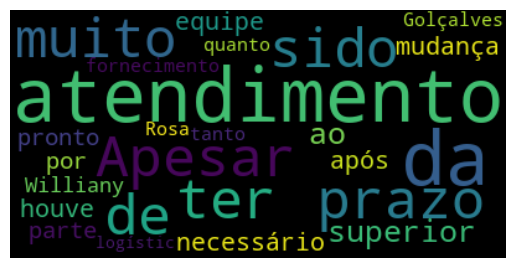

In [26]:
# Start with one review:
texto = comentarios_filtrados.Comentário[130]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(texto)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
# baixa as stopwords
nltk.download('stopwords')

# para escolher as stopwords do português adicionamos a opção de língua "portuguese"
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
stopwords[:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [29]:
len(stopwords)

207

In [30]:
texto = " ".join(Comentário for Comentário in comentarios_filtrados.Comentário)
print ("There are {} words in the combination of all review.".format(len(texto)))

There are 2282819 words in the combination of all review.


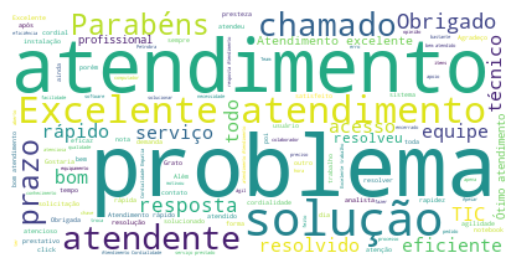

In [31]:
# Create stopword list:
stopwords = set(stopwords)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(texto)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Contagem de pesquisas com comentários, separados por favoráveis e não favoráveis. #### 

In [32]:
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')

# Pivoted into base_tratada
base_tratada_pivot = pd.DataFrame(data={})

# Renamed base_tratada_pivot to contagem_comentarios
contagem_comentarios = base_tratada_pivot

# Pivoted into base_tratada
tmp_df = base_tratada[base_tratada['Comentário'].notnull()]
tmp_df = tmp_df[['Favorabilidade']]
pivot_table = tmp_df.pivot_table(
    index=['Favorabilidade'],
    values=['Favorabilidade'],
    aggfunc={'Favorabilidade': ['count']}
)
pivot_table.set_axis([mito.flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
contagem_comentarios = pivot_table.reset_index()
print(contagem_comentarios)

   Favorabilidade  Favorabilidade count
0             0.0                  6275
1             1.0                 22752


#### Apenas comentários de pesquisas com notas não favoráveis. ####

In [33]:
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')
base_tratada = base_tratada.dropna(subset=['Favorabilidade'])
base_tratada_n_favoravel = base_tratada.drop(base_tratada[(base_tratada['Favorabilidade'] == 1.0)].index)

In [34]:
texto_n_favoravel = base_tratada_n_favoravel[base_tratada_n_favoravel['Comentário'].notnull()]
texto_n_favoravel.head()

,NrMotivo,OrdemResposta,OrdemEncerramento,Categoria Maior,Status do SLA,Origem,Produto,Avaliação,Tempo utilizado para resolução (min),Motivo,Comentário,PesquisaRespondida,Favorabilidade,Ano/Mes_Resposta,Ano/Mes_Encerramento
180,3.0,1.0,1,Solicitações de Serviço,Fora do Prazo,ITSM,MICROCOMPUTADOR,1.0,914.0,Solucao,"moterial não foi entregue a minha pessoa, colocar a informação de quem recebeu o material de fato.",1.0,0.0,2021/1,2021/1
187,1.0,1.0,1,Incidentes,Fora do Prazo,Telefone,TELEFONIA FIXA,3.0,820.0,Prazo,"A demora foi muito grande, mas finalmente foi atendido.",1.0,0.0,2021/1,2021/1
314,1.0,3.0,1,Incidentes,Fora do Prazo,ITSM,APLICACAO NIVEL C,1.0,461.0,Prazo,Atendimento com prazo fora do aceitável.,1.0,0.0,2021/3,2021/1
515,1.0,1.0,1,Incidentes,Fora do Prazo,Outros,APLICACAO NIVEL B,1.0,487.0,Prazo,O chamado ficou em aberto por mais de 2 meses! E só foi atendido após muita insistência da minha parte!,1.0,0.0,2021/1,2021/1
523,3.0,1.0,1,Incidentes,Fora do Prazo,Telefone,ACESSO REMOTO,1.0,453.0,Solucao,Não atendeu ao pedido. Continuo com dificuldades no trabalho porque a versão Web não funciona da mesma forma que na aplicação.,1.0,0.0,2021/1,2021/1


In [35]:
len(texto_n_favoravel)

6275

In [36]:
# baixa as stopwords
nltk.download('stopwords')

# para escolher as stopwords do português adicionamos a opção de língua "portuguese"
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


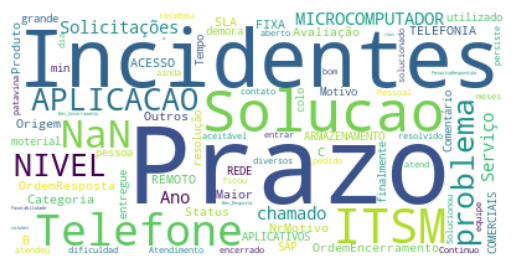

In [37]:
# Create stopword list:
stopwords = set(stopwords)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(texto_n_favoravel))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Apenas comentários de pesquisas com notas favoráveis. ####

In [38]:
base_tratada = pd.read_csv(r'base_tratada.csv', encoding='ISO-8859-1')
base_tratada = base_tratada.dropna(subset=['Favorabilidade'])
base_tratada_favoravel = base_tratada.drop(base_tratada[(base_tratada['Favorabilidade'] == 0.0)].index)

In [39]:
texto_favoravel = base_tratada_favoravel[base_tratada_favoravel['Comentário'].notnull()]
texto_favoravel.head()

,NrMotivo,OrdemResposta,OrdemEncerramento,Categoria Maior,Status do SLA,Origem,Produto,Avaliação,Tempo utilizado para resolução (min),Motivo,Comentário,PesquisaRespondida,Favorabilidade,Ano/Mes_Resposta,Ano/Mes_Encerramento
130,2.0,1.0,1,Solicitações de Serviço,Fora do Prazo,ITSM,MICROCOMPUTADOR,5.0,959.0,Atendimento,"Apesar do prazo de atendimento ter sido muito superior ao necessário, após a mudança da equipe, houve pronto atendimento por parte da Williany Golçalves Rosa, tanto no fornecimento, quanto a logístic",1.0,1.0,2021/1,2021/1
135,1.0,1.0,1,Solicitações de Serviço,Fora do Prazo,ITSM,MICROCOMPUTADOR,4.0,938.0,Prazo,A demora para o atendimento foi o motivo da nota.,1.0,1.0,2021/1,2021/1
214,1.0,1.0,1,Incidentes,Fora do Prazo,Outros,Suporte às Operações,4.0,852.0,Prazo,demoraram,1.0,1.0,2021/1,2021/1
247,4.0,1.0,1,Incidentes,Fora do Prazo,Telefone,ACESSO A REDE E INTERNET,4.0,640.0,Facilidade,SUPER AGRADEÇO O RETORNO PARA SOLUCIONAR O PROBLEMA APRESENTADO,1.0,1.0,2021/1,2021/1
259,1.0,1.0,1,Solicitações de Serviço,Fora do Prazo,ITSM,A DEFINIR,5.0,612.0,Prazo,Esta pesquisa foi enviada de forma incorreta para a minha chave. favor verificar.,1.0,1.0,2021/1,2021/1


In [40]:
len(texto_favoravel)

22752

In [41]:
# baixa as stopwords
nltk.download('stopwords')

# para escolher as stopwords do português adicionamos a opção de língua "portuguese"
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


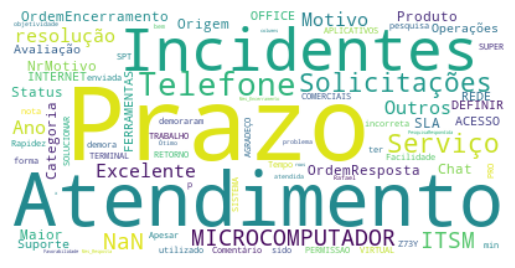

In [42]:
# Create stopword list:
stopwords = set(stopwords)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(texto_favoravel))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()